In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/workspaces/UnBalance-Credit-Fraud-Detection/data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/workspaces/UnBalance-Credit-Fraud-Detection/data/creditcard.csv


In [8]:
!python --version

Python 3.12.1


In [9]:
df = pd.read_csv(os.path.join(dirname, filename))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_20530/4016417465.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


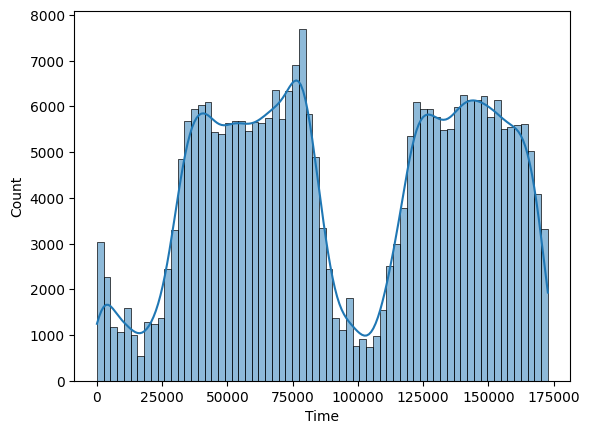

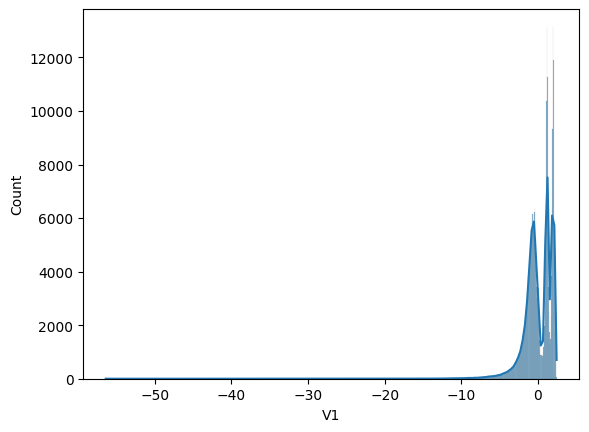

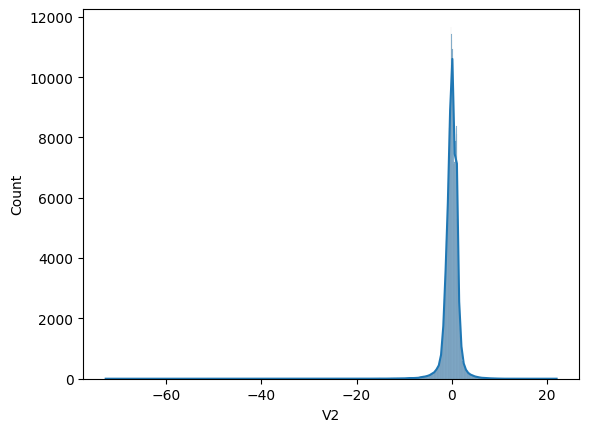

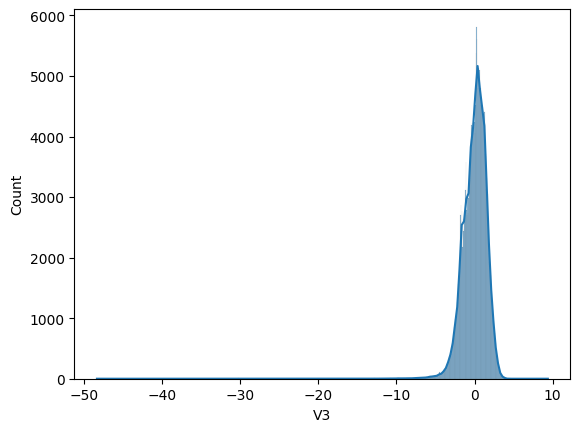

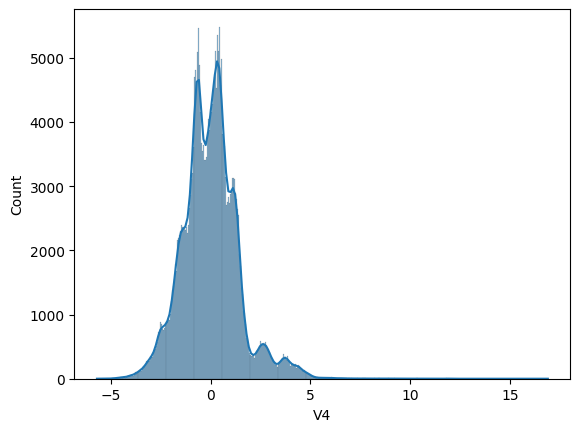

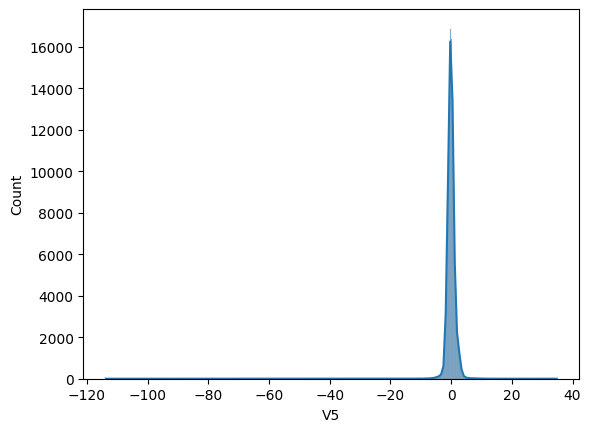

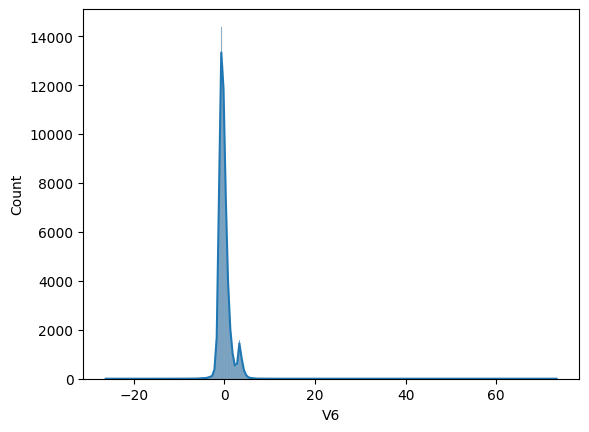

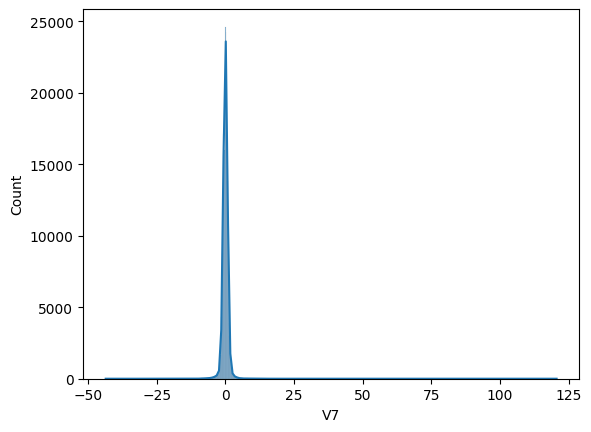

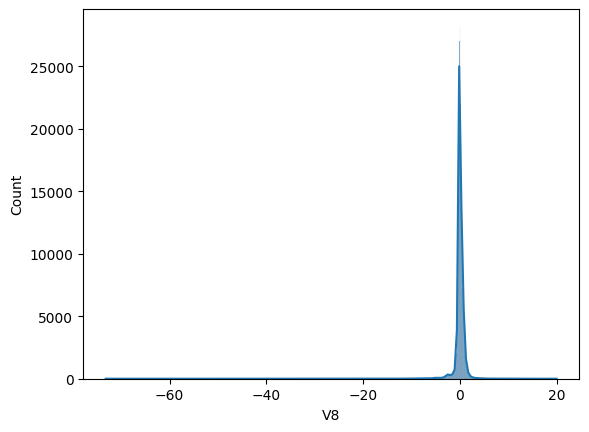

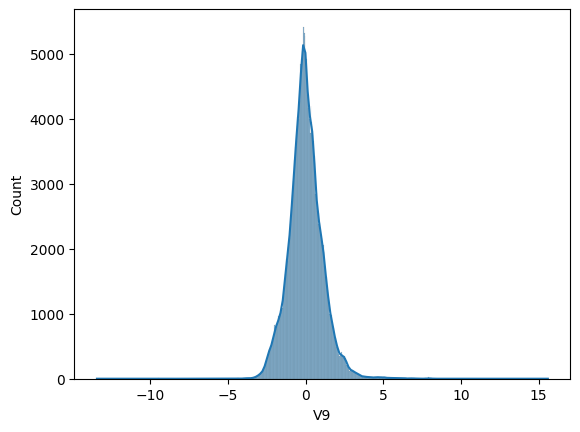

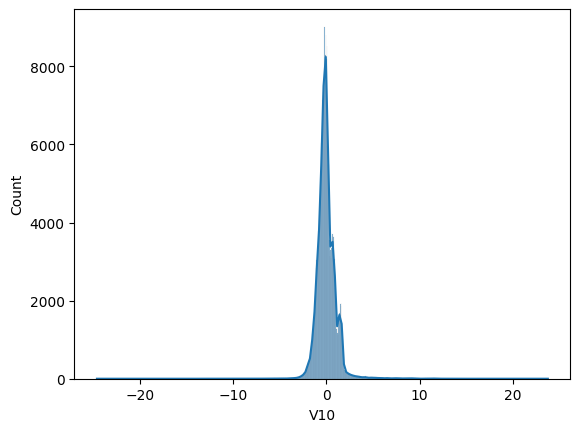

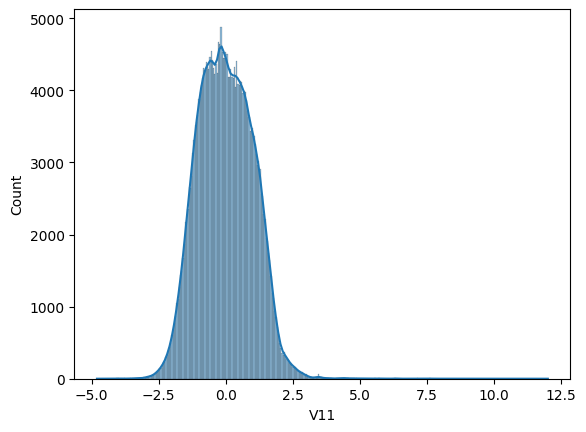

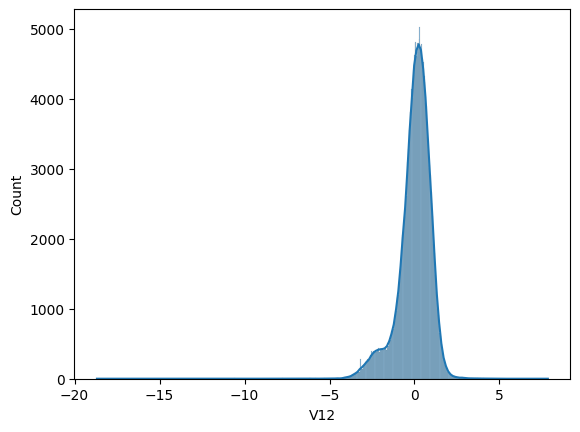

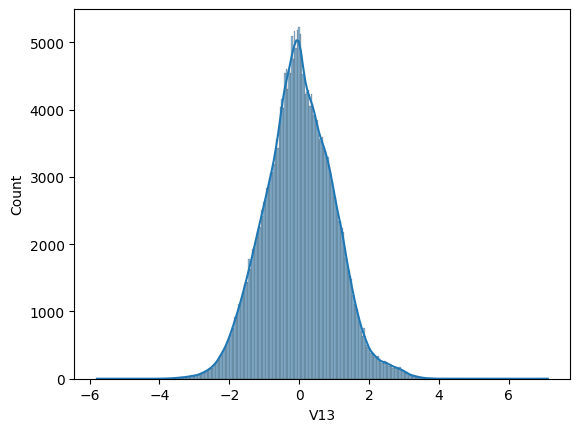

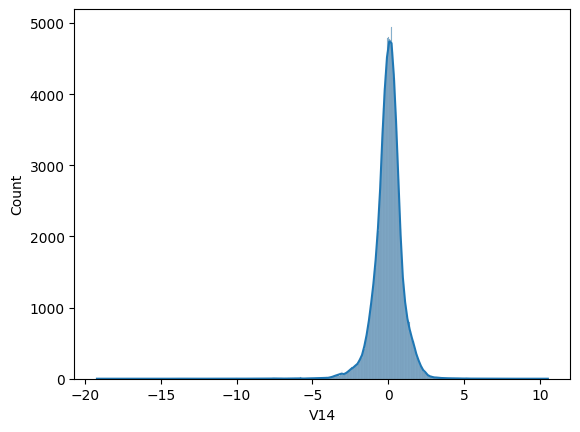

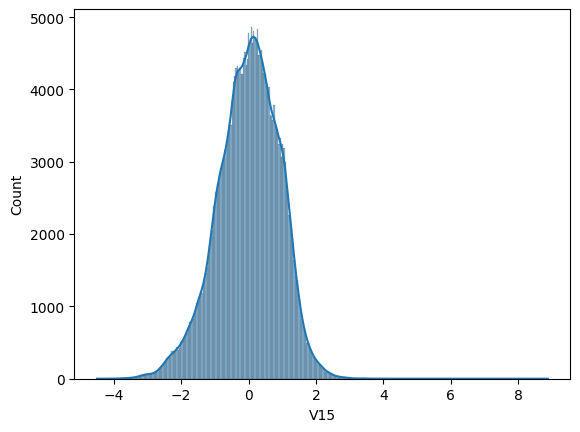

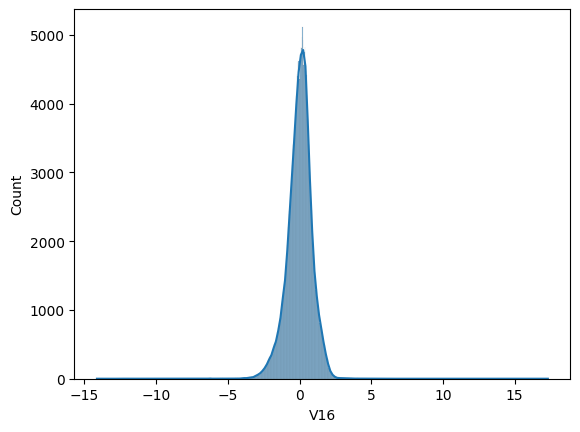

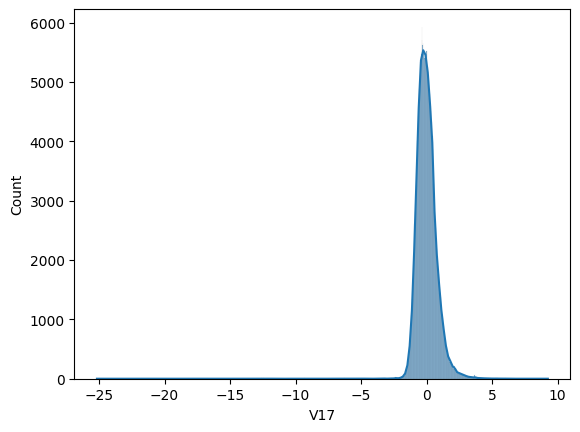

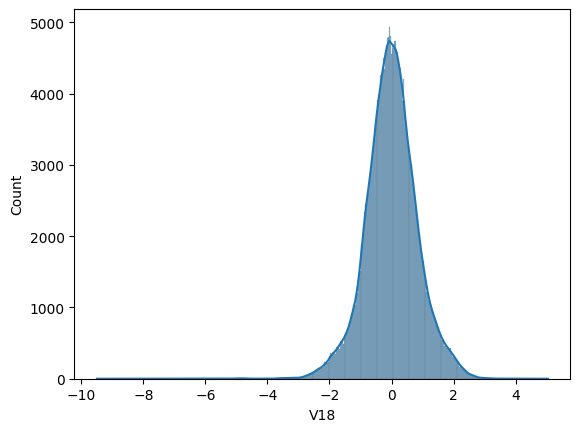

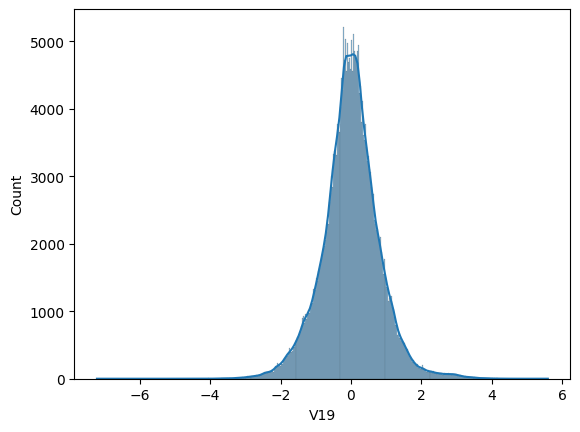

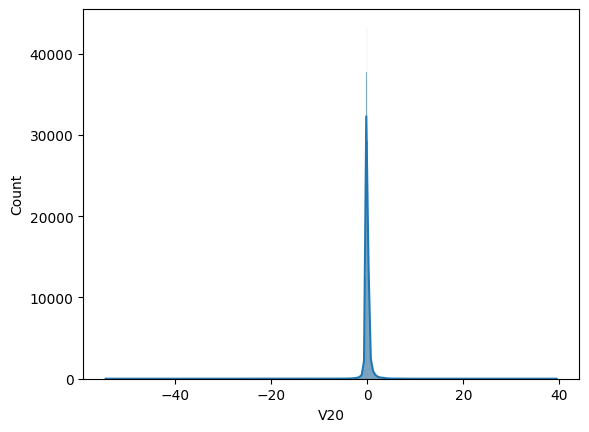

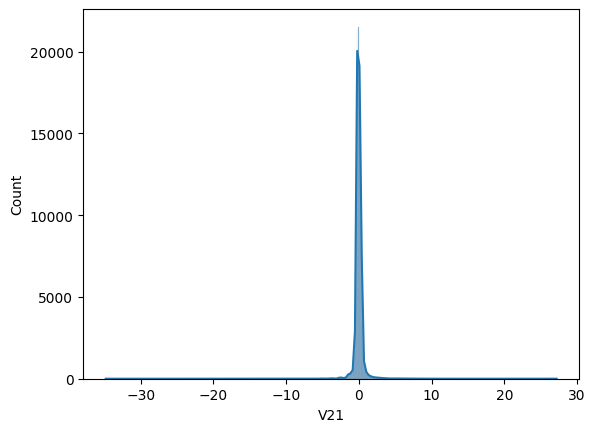

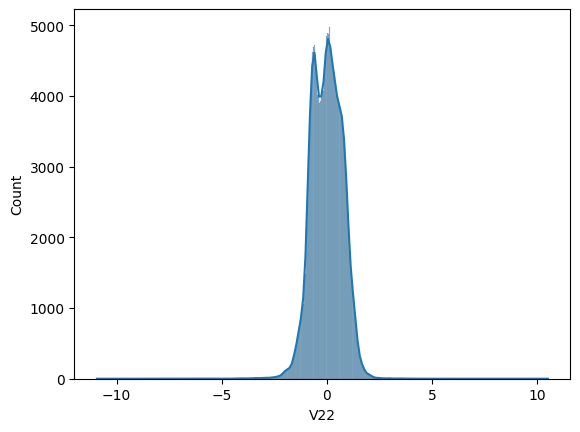

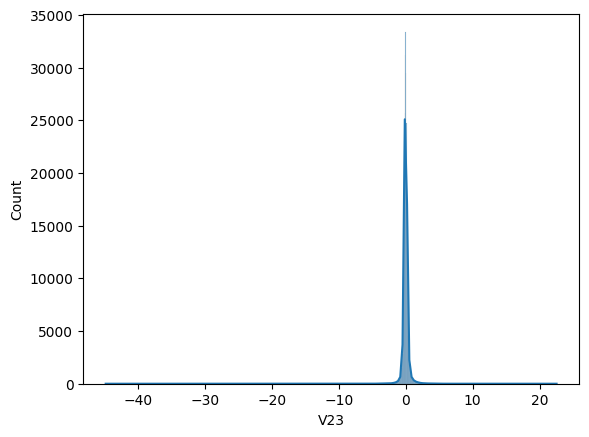

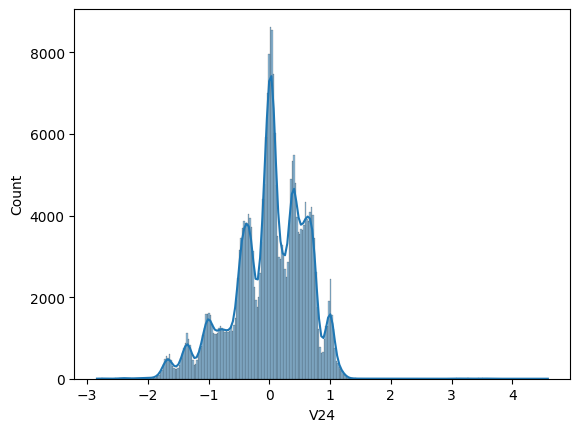

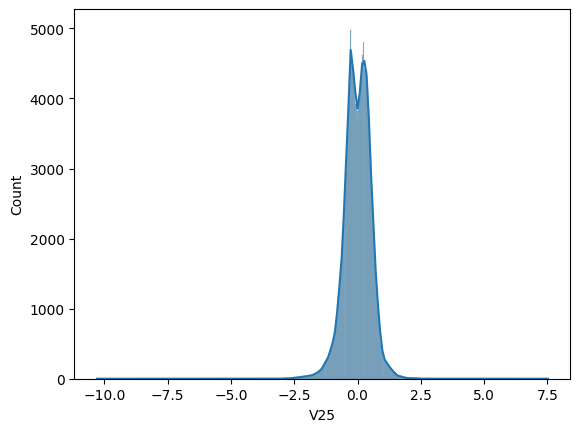

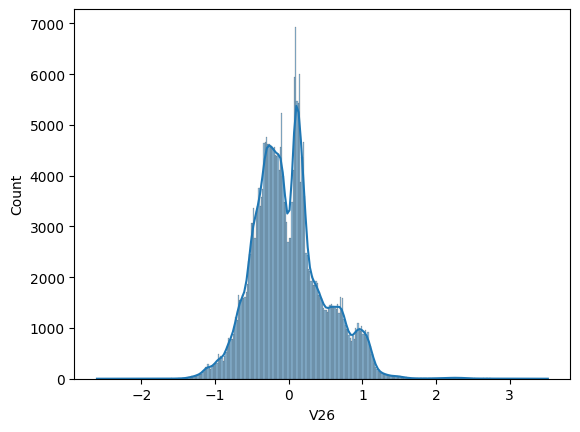

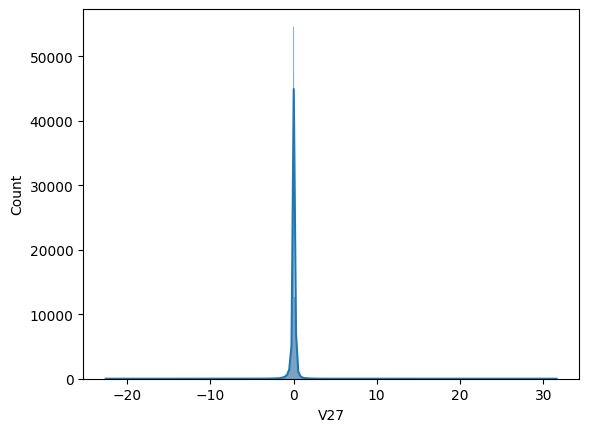

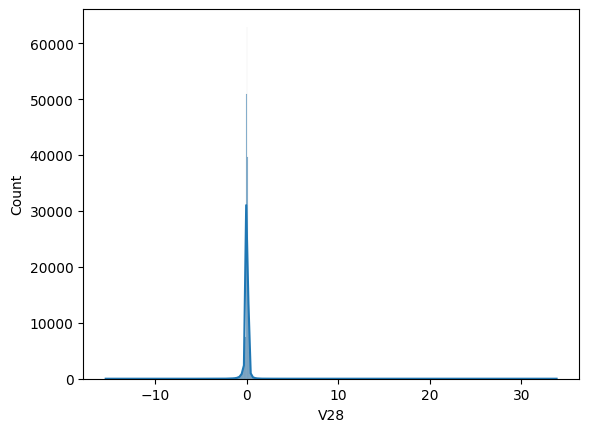

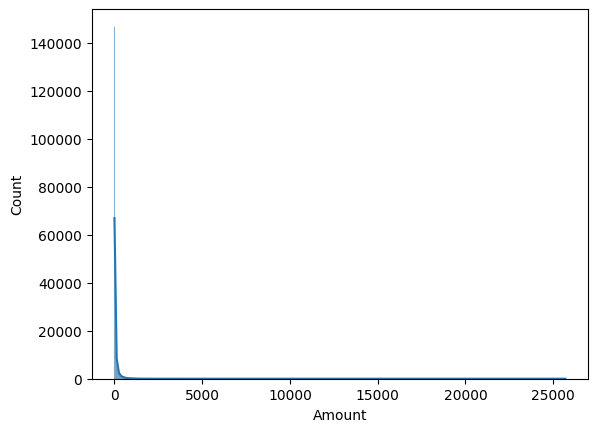

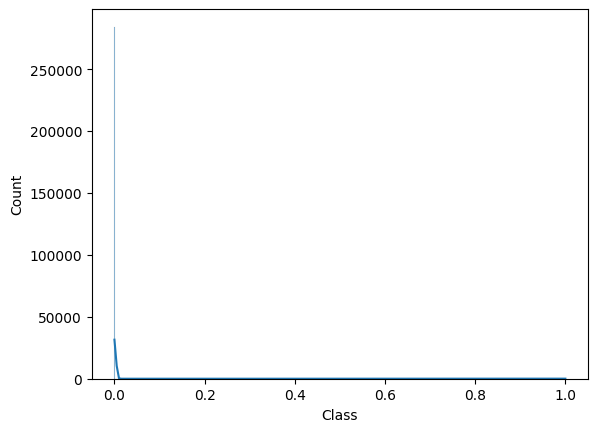

In [16]:
for col in df.columns:
    plt.figure()
    sns.histplot(df[col],kde = True)

In [12]:
# pip install imbalanced-learn==0.13.0 scikit-learn==1.3.2
import sklearn
print(sklearn.__version__)
!pip install imbalanced-learn==0.8.1

1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
X = df.drop(['Class'],axis = 1)
y  = df['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
y_test.value_counts()

Class
0    56856
1      106
Name: count, dtype: int64

In [18]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

In [ ]:


base = LogisticRegression(max_iter = 1000)
base.fit(X_train, y_train)

base2 = LogisticRegression(max_iter = 1000,class_weight = "balanced")
base2.fit(X_train, y_train)

base3 = LogisticRegression(max_iter = 1000,class_weight = "balanced")
base3.fit(X_res, y_res)

In [20]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred1 = base.predict(X_test)
y_pred2 = base2.predict(X_test)
y_pred3 = base3.predict(X_test)

print("Base:\n", classification_report(y_test, y_pred1))
print("Base2 (weighted):\n", classification_report(y_test, y_pred2))
print("Base3 (resampled):\n", classification_report(y_test, y_pred3))

Base:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.83      0.64      0.72       106

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Base2 (weighted):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56856
           1       0.05      0.89      0.09       106

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Base3 (resampled):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56856
           1       0.09      0.87      0.16       106

    accuracy                           0.98     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00     

In [21]:
ensemble = RandomForestClassifier(n_estimators=100,n_jobs=-1)
ensemble.fit(X_train, y_train)

ensemble2 = RandomForestClassifier(n_estimators = 100,class_weight='balanced',n_jobs = -1)
ensemble2.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [22]:

ensemble3 = RandomForestClassifier(n_estimators = 100,class_weight='balanced',n_jobs = -1)
ensemble3.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [23]:
ensample_y_pred1 = ensemble.predict(X_test)
ensample_y_pred2 = ensemble2.predict(X_test)
ensample_y_pred3 = ensemble3.predict(X_test)

print("ensemble:\n", classification_report(y_test, ensample_y_pred1))
print("ensemble2 (weighted):\n", classification_report(y_test, ensample_y_pred2))
print("ensemble3 (resampled):\n", classification_report(y_test, ensample_y_pred3))

ensemble:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.92      0.72      0.80       106

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ensemble2 (weighted):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.91      0.71      0.80       106

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ensemble3 (resampled):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.91      0.81      0.86       106

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg    

In [24]:
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam


2025-06-02 04:19:07.723826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748837947.930219      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748837947.985688      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
input_dim = X_train.shape[1]

# --- Model factory function ---
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [26]:
# --- Train the model ---
model1 = create_model()
model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# --- Make predictions ---
y_probs1 = model1.predict(X_test).flatten()   # Probabilities
y_pred1 = (y_probs1 >= 0.5).astype(int)         # Classification threshold



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748837959.958188      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/10


I0000 00:00:1748837962.927005     169 service.cc:148] XLA service 0x7d87e4008d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748837962.927526     169 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748837963.162716     169 cuda_dnn.cc:529] Loaded cuDNN version 90300


 124/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.5306 - loss: 5289.0830   

I0000 00:00:1748837964.063616     169 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9699 - loss: 261.7618
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9970 - loss: 1.6502
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9982 - loss: 0.0207
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9983 - loss: 0.0208
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9984 - loss: 0.0238
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9982 - loss: 0.0558
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9984 - loss: 0.0125
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9984 - loss: 0.0133
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9984 - loss: 0.0120
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9982 - loss: 0.0136
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [27]:
# --- Train the model ---
model2 = create_model()
model2.fit(X_res, y_res, epochs=10, batch_size=32, verbose=1)

# --- Make predictions ---
y_probs2 = model2.predict(X_test).flatten()   # Probabilities
y_pred2 = (y_probs2 > 0.5).astype(int)         # Classification threshold


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.6090 - loss: 332.6419
Epoch 2/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7973 - loss: 0.4683
Epoch 3/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8548 - loss: 0.3335
Epoch 4/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8835 - loss: 0.2814
Epoch 5/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9202 - loss: 0.2343
Epoch 6/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9173 - loss: 0.2383
Epoch 7/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9217 - loss: 0.2292
Epoch 8/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9234 - loss: 0.2269
Epoch 9/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9245 - loss: 0.2248
Epoch 10/10
14181/14181 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9243 - loss: 0.2234
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [28]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

In [41]:
class_weights_dict

{0: 0.5008683227082875, 1: 288.4113924050633}

In [29]:


print("nn:\n", classification_report(y_test, y_pred1))
print("nn (weighted):\n", classification_report(y_test, y_pred2))

nn:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.00      0.00      0.00       106

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

nn (weighted):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.49      0.77      0.60       106

    accuracy                           1.00     56962
   macro avg       0.74      0.89      0.80     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
